# GLOBAL PARAM

In [1]:
from SoundDataSet import MusicDataSet
from Transforms import *
from sklearn.preprocessing import MultiLabelBinarizer

import pandas as pd
import matplotlib.pyplot as plt
import IPython

%matplotlib inline

directory="../input/"
head=10

# Plot util

In [2]:
def plot(data_set, transforms):
    plt.figure(figsize=(20, 15))
    for i, elem in enumerate(data_set):
        text = columns[elem[0] == 1].tolist()
        text = ', '.join(text)
        data = elem[1]
        if channel == 3:
            data = np.swapaxes(data, 1, 2)
            data = np.swapaxes(data, 0, 2)
            plt.axis('off')
            plt.subplot(len(data_set), 1, i + 1)
            plt.title(text)
            p = plt.imshow(data)
            plt.colorbar(p)
        else:
            for ch in range(channel):
                data_channel = data[ch][:, :]
                plt.axis('off')
                plt.subplot(len(data_set), channel, channel * i + ch + 1)
                plt.title(text)
                p = plt.imshow(data_channel, cmap='Greys')
                plt.colorbar(p)

def plotaudio(data_set, transforms):
    plt.figure(figsize=(20, 15))
    for i, elem in enumerate(data_set):
        for ch in range(channel):
            text = columns[elem[0] == 1].tolist()
            text = ', '.join(text)
            plt.axis('off')
            plt.subplot(len(data_set), channel, channel * i + ch + 1)
            plt.title(text)
            data = elem[1][ch]
            plt.plot(data)

# Preprocessing

In [3]:
transforms = [
    OpenMelSpectrFile(),
    Trim(level=0.01),
    RandomCutCancat(window=128, batch=4, dropout=0.2, pad='mean'),
    RandomHorizontalFlip(prob=1),
    Power(0.125),
    Aug(freq_mask_num=2, freq_mask_prob=0.15, time_mask_num=0, time_mask_prob=0.0),
    AddChannelDimension(),
    RGB(channel=0, inplace=True, normalize=True)
]
channel=3
columns = pd.read_csv(directory + "sample_submission.csv").columns.values[1:]


In [4]:
# transforms = [
#     OpenAudioFile(),
#     RandomCutAudio(window=65536),
#     RandomShiftWithZeroPadAudio(window=65536),
#     AddChannelDimensionAudio(),
#     Normalize(channel=0),
# ]
# channel=1
# columns = pd.read_csv(directory + "sample_submission.csv").columns.values[1:]


# CURATED

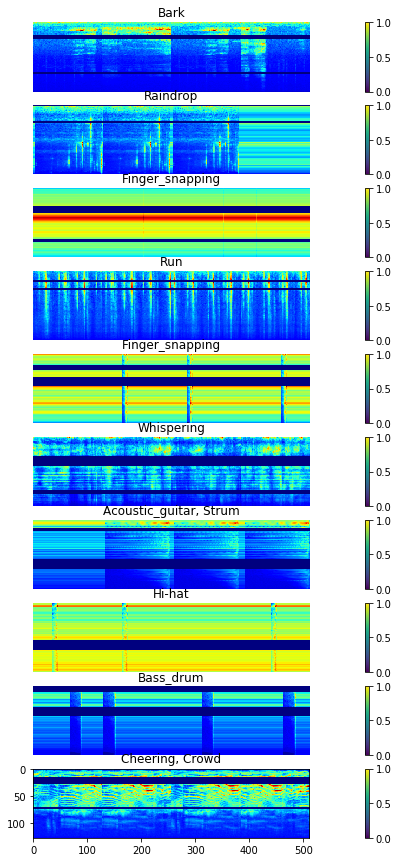

In [5]:
data_type="train_curated"

df = pd.read_csv(directory + data_type + ".csv")
data_set = MusicDataSet(directory + data_type + "/",
                        file_names=sorted(df['fname'].values)[:head],
                        labels=MultiLabelBinarizer().fit_transform(df['labels'].str.split(",")),
                        transforms=transforms)



plot(data_set, transforms)

# NOISY

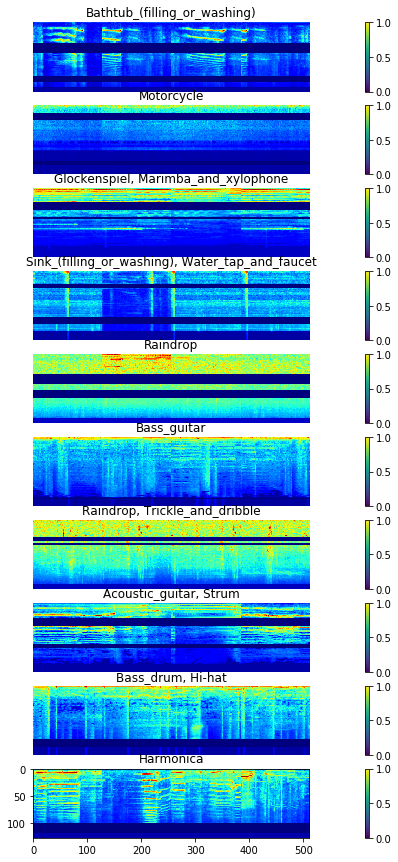

In [6]:
data_type="train_noisy"
df = pd.read_csv(directory + data_type + ".csv")
data_set = MusicDataSet(directory + data_type + "/",
                        file_names=sorted(df['fname'].values)[:head],
                        labels=MultiLabelBinarizer().fit_transform(df['labels'].str.split(",")),
                        transforms=transforms)



plot(data_set, transforms)

# Filter class

In [7]:
theclass = 'Whispering'

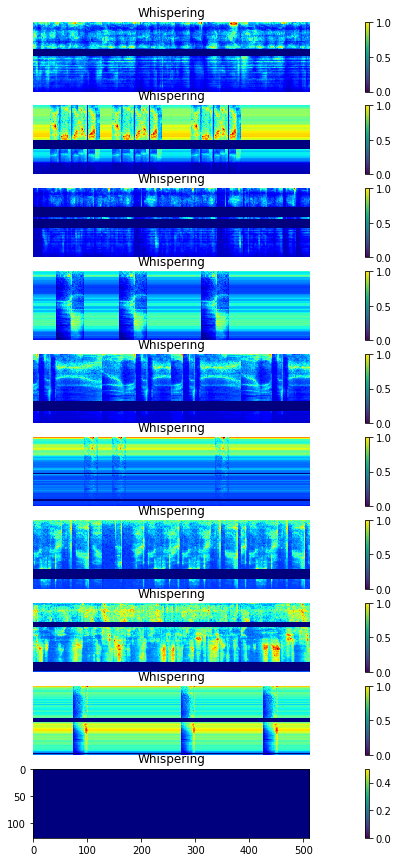

In [8]:
data_type="train_curated"

df = pd.read_csv(directory + data_type + ".csv")
wav_fnames = sorted(df['fname'].values)
labels = MultiLabelBinarizer().fit_transform(df['labels'].str.split(","))

df = pd.DataFrame(data=labels, columns=columns, index=wav_fnames)
wav_fnames_class = df[df[theclass] == 1].index.values[:head]
labels_class = df.loc[wav_fnames_class].values

df = pd.read_csv(directory + data_type + ".csv")
data_set = MusicDataSet(directory + data_type + "/",
                        file_names=wav_fnames_class,
                        labels=labels_class,
                        transforms=transforms)



plot(data_set, transforms)